# association-rule-mining

# Installation

In [ ]:
!pip install pycaret[full]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


In [ ]:
from pycaret.datasets import get_data
data = get_data('germany')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany


In [ ]:
data.shape

(9495, 8)

In [ ]:
data=data.dropna(subset=['InvoiceNo','Description'])
data['InvoiceNo']=data['InvoiceNo'].astype(str)

In [ ]:
b=data.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
b=b.applymap(lambda x: 1 if x>0 else 0)

In [ ]:
f=apriori(b,min_support=0.01,use_colnames=True)

In [ ]:
r=association_rules(f,metric='confidence',min_threshold=0.7)

In [ ]:
print("Frequent Itemsets:")
print(f.head())


Frequent Itemsets:
    support                         itemsets
0  0.011609             ( DOLLY GIRL BEAKER)
1  0.018242         (10 COLOUR SPACEBOY PEN)
2  0.016584  (12 PENCIL SMALL TUBE WOODLAND)
3  0.014925  (12 PENCILS TALL TUBE WOODLAND)
4  0.024876     (3 HOOK HANGER MAGIC GARDEN)


In [ ]:
print("\nAssociation Rules:")
print(r.head())


Association Rules:
                       antecedents                            consequents  \
0             ( DOLLY GIRL BEAKER)                              (POSTAGE)   
1         (10 COLOUR SPACEBOY PEN)                              (POSTAGE)   
2  (12 PENCIL SMALL TUBE WOODLAND)                              (POSTAGE)   
3  (12 PENCILS TALL TUBE WOODLAND)                              (POSTAGE)   
4  (12 PENCILS TALL TUBE WOODLAND)  (ROUND SNACK BOXES SET OF4 WOODLAND )   

   antecedent support  consequent support   support  confidence      lift  \
0            0.011609            0.620232  0.011609    1.000000  1.612299   
1            0.018242            0.620232  0.018242    1.000000  1.612299   
2            0.016584            0.620232  0.013267    0.800000  1.289840   
3            0.014925            0.620232  0.013267    0.888889  1.433155   
4            0.014925            0.185738  0.011609    0.777778  4.187500   

   leverage  conviction  zhangs_metric  
0  0.004409  

In [ ]:
f.to_csv('frequent_itemsets.csv', index=False)
r.to_csv('association_rules.csv', index=False)

In [ ]:
sns.set(style="whitegrid")

Text(0.5, 1.0, 'Association Rules Visualization')

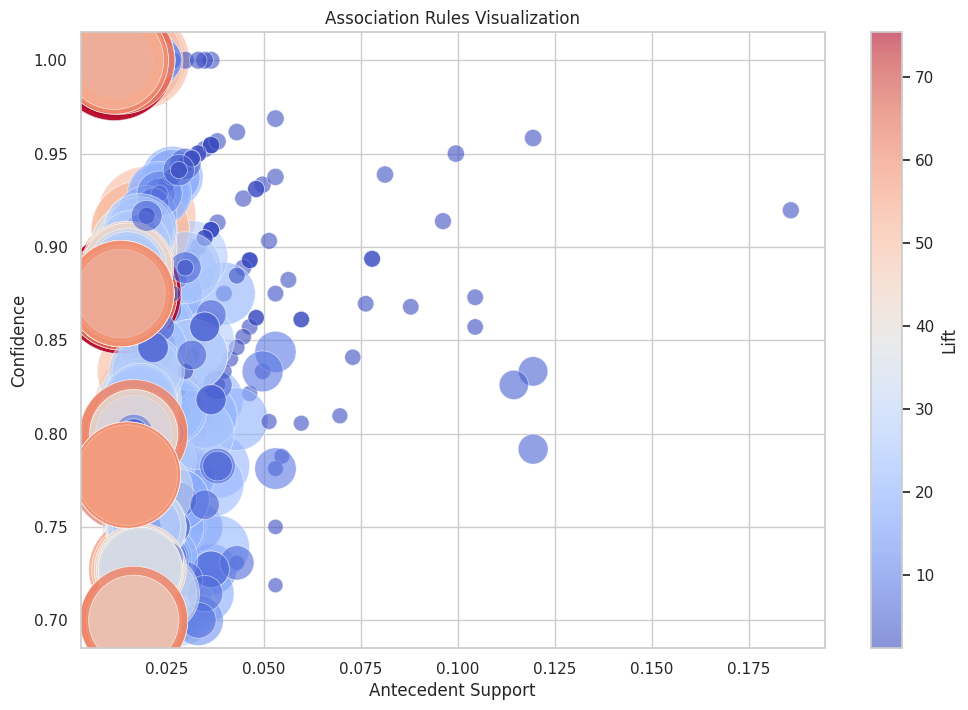

In [ ]:
plt.figure(figsize=(12, 8))
scatter=plt.scatter(data=r, x='antecedent support', y='confidence', s=r['lift']*100, c=r['lift'], cmap='coolwarm',alpha=0.6, edgecolors='w',linewidth=0.5)
plt.colorbar(scatter,label="Lift")
plt.xlabel('Antecedent Support')
plt.ylabel('Confidence')
plt.title('Association Rules Visualization')


Text(0.5, 1.0, 'Top 10 Association Rules by Confidence')

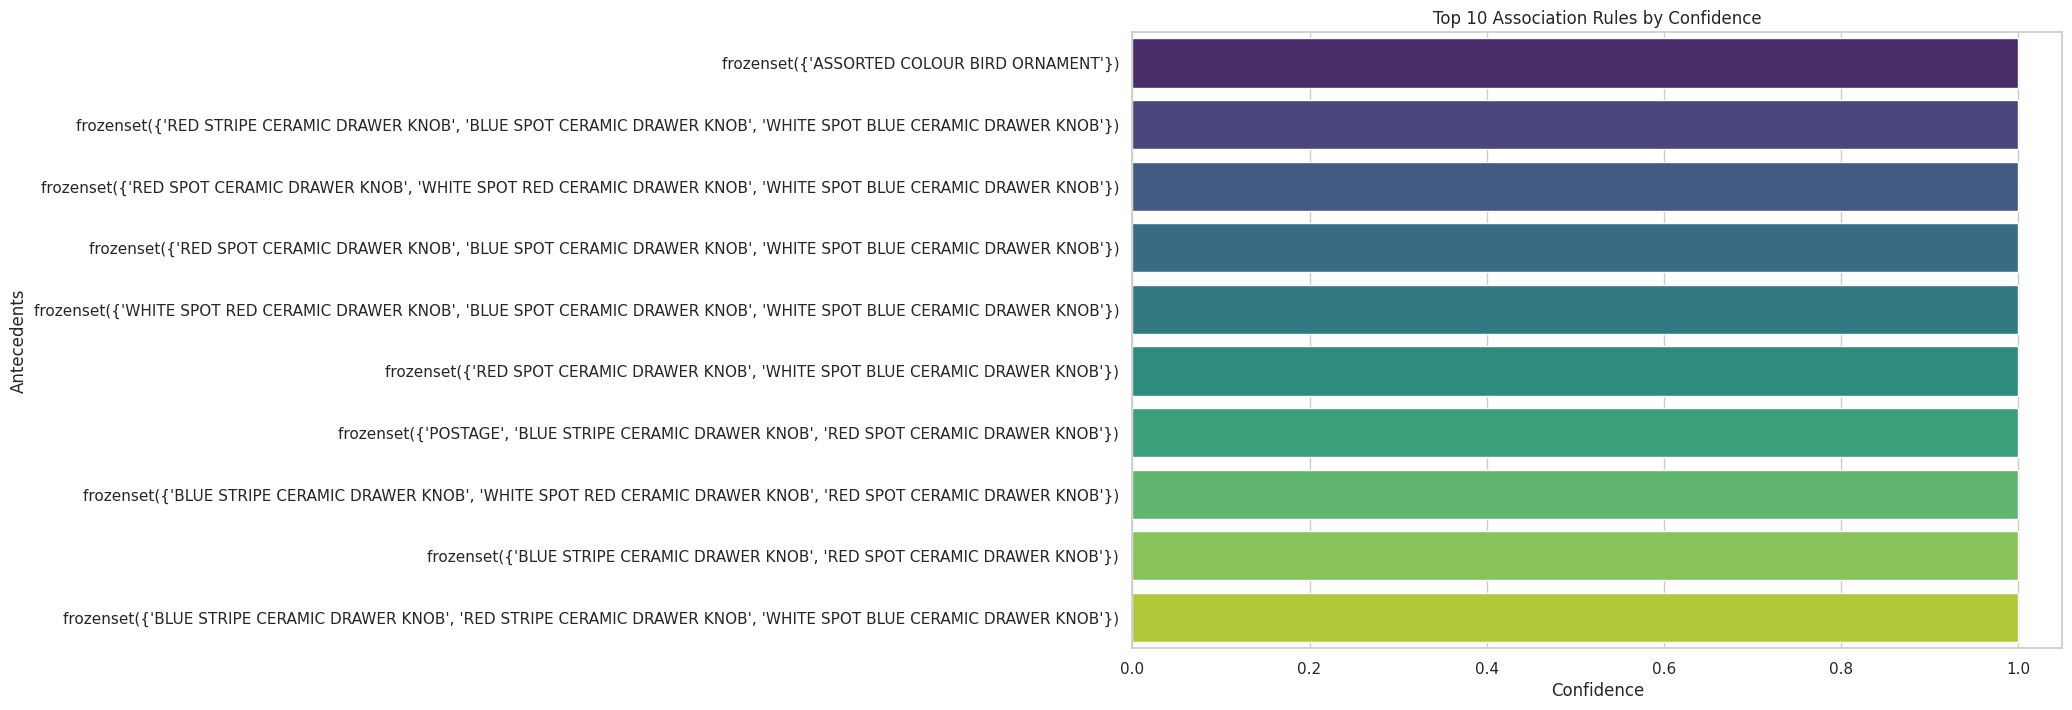

In [ ]:
t=r.sort_values(by='confidence',ascending=False).head(10)
plt.figure(figsize=(12, 8))
bar=sns.barplot(data=t,x='confidence',y='antecedents', palette='viridis')

plt.xlabel('Confidence')
plt.ylabel('Antecedents')
plt.title('Top 10 Association Rules by Confidence')

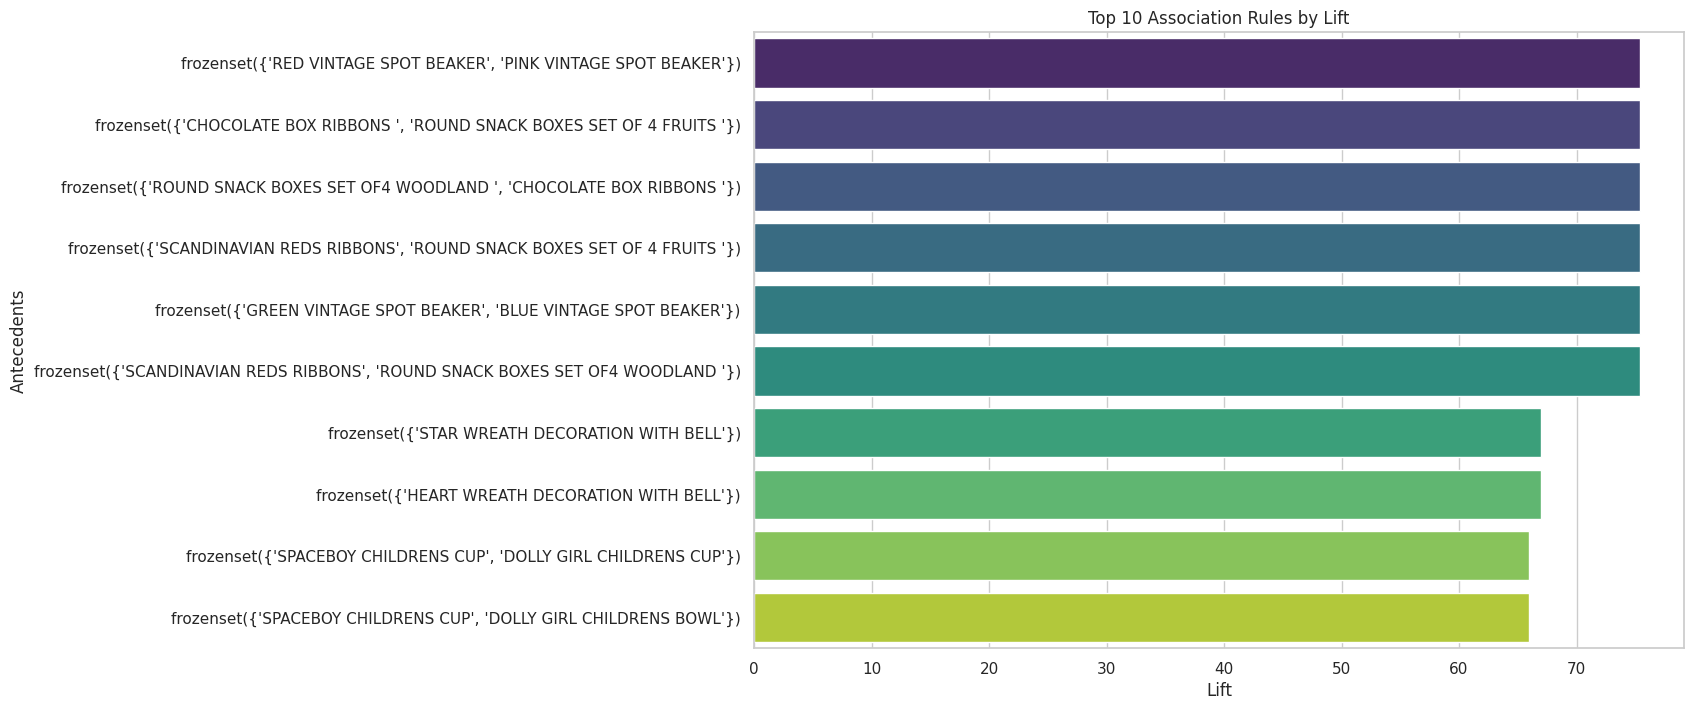

In [ ]:
tr=r.sort_values(by='lift',ascending=False).head(10)
plt.figure(figsize=(12, 8))
bar=sns.barplot(data=tr,x='lift',y='antecedents', palette='viridis')

plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.title('Top 10 Association Rules by Lift')
plt.show()